## 결측치, 이상치 확인 및 시각화
### 수행단계
- 데이터의 결측치 및 이상치 확인
    - 데이터에 결측치가 있는지 확인하고 처리하라.
    - 데이터에 이상치가 있는지 확인하고 처리하라.
- 시각화를 통한 탐색
    - 사용자별/영화별 평점 분포를 히스토그램, 박스 플롯 등으로 시각화하라. (Histogram)
    - 가장 많이 평가된 영화, 가장 높은 평균 평점을 받은 영화 등의 리스트를 확인하라.
    - 시간에 따른 평점의 변화나 패턴을 라인 플롯으로 확인하라. (Line chart)

In [9]:
import pandas as pd

# 데이터 로드
movies = pd.read_csv('kmrd-small/movies.txt', sep="\t", engine='python')
users = pd.read_csv('kmrd-small/rates.csv')
countries = pd.read_csv('kmrd-small/countries.csv')
people = pd.read_csv('kmrd-small/peoples.txt', sep="\t", engine='python')
genres = pd.read_csv('kmrd-small/genres.csv')
casting = pd.read_csv('kmrd-small/castings.csv')

# 데이터프레임 딕셔너리로 관리
datasets = {
    'movies': movies,
    'users': users,
    'countries': countries,
    'people': people,
    'genres': genres,
    'casting': casting
}

In [ ]:
# 모든 데이터프레임의 결측치 확인
for name, df in datasets.items():
    print(f"{name} 데이터프레임 결측치 개수:\n{df.isnull().sum()}\n")

# 결측치가 있는 행 제거
for name, df in datasets.items():
    datasets[name] = df.dropna()  


movies 데이터프레임 결측치 개수:
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64

users 데이터프레임 결측치 개수:
user     0
movie    0
rate     0
time     0
dtype: int64

countries 데이터프레임 결측치 개수:
movie      0
country    0
dtype: int64

people 데이터프레임 결측치 개수:
people        0
korean        0
original    867
dtype: int64

genres 데이터프레임 결측치 개수:
movie    0
genre    0
dtype: int64

casting 데이터프레임 결측치 개수:
movie      0
people     0
order      0
leading    0
dtype: int64



In [11]:
# users 데이터프레임의 'rate' 컬럼 이상치 탐지 및 처리
q1 = users['rate'].quantile(0.25)
q3 = users['rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치 확인
outliers = users[(users['rate'] < lower_bound) | (users['rate'] > upper_bound)]
print(f"이상치 개수: {len(outliers)}")

# 이상치 제거
datasets['users'] = users[(users['rate'] >= lower_bound) & (users['rate'] <= upper_bound)]


이상치 개수: 20101


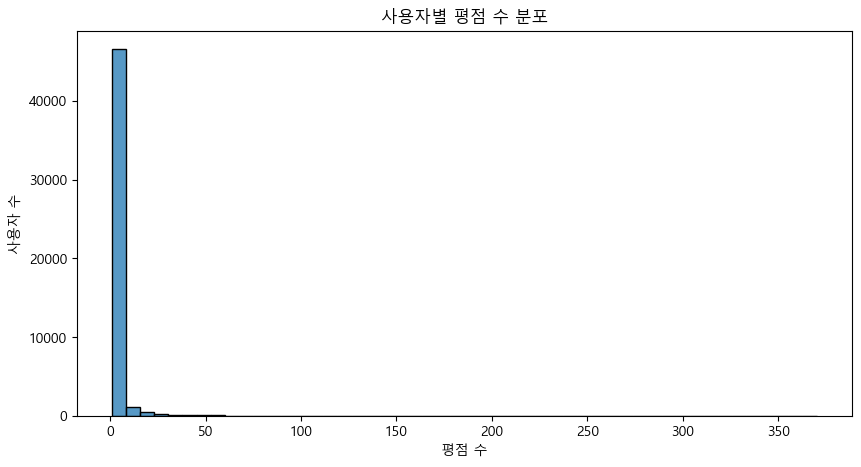

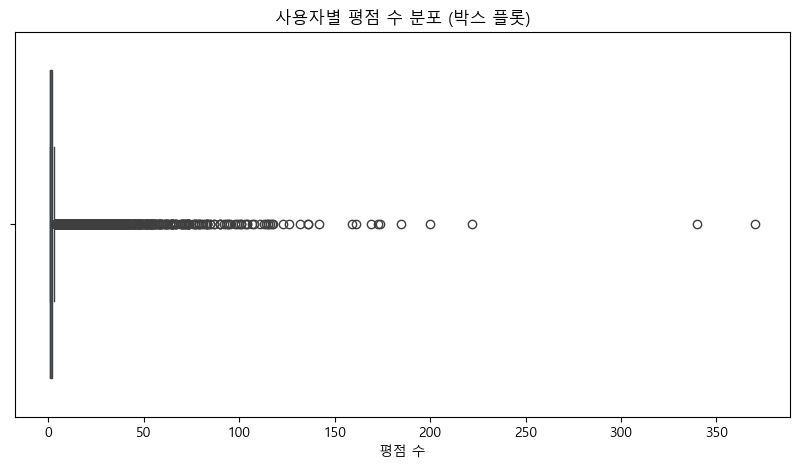

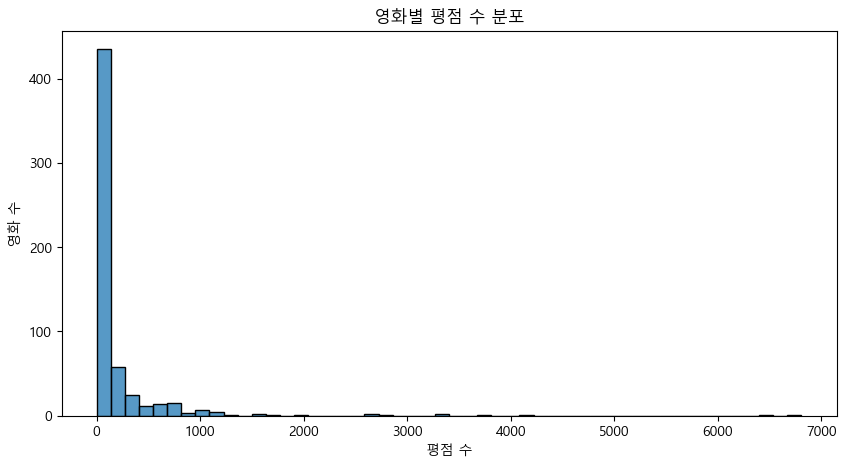

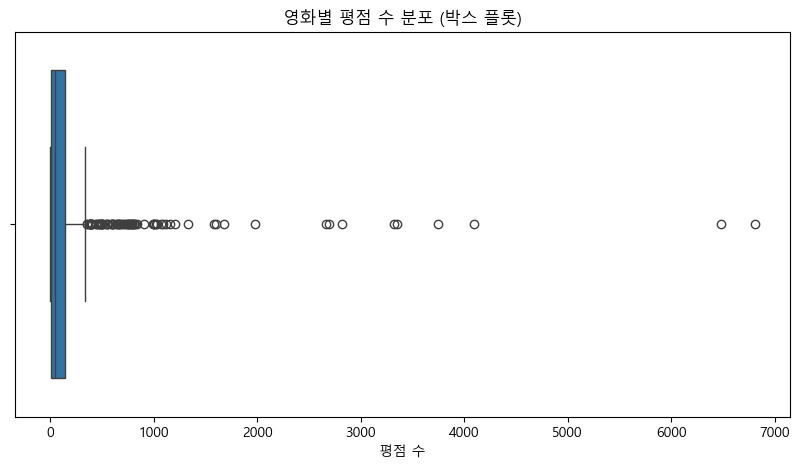

In [24]:
# %pip install matplotlib
# %pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc

# 한글 폰트 설정 (Windows의 '맑은 고딕' 예제)
rc('font', family='Malgun Gothic')

# 한글 깨짐 방지를 위한 유니코드 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호가 깨지는 현상 방지지

# 사용자별 평점 수 분포 (히스토그램)
user_rate_count = datasets['users'].groupby('user')['rate'].count()
plt.figure(figsize=(10, 5))
sns.histplot(user_rate_count, bins=50, kde=False)
plt.title('사용자별 평점 수 분포')
plt.xlabel('평점 수')
plt.ylabel('사용자 수')
plt.show()

# 사용자별 평점 수 분포 (박스 플롯)
plt.figure(figsize=(10, 5))
sns.boxplot(x=user_rate_count)
plt.title('사용자별 평점 수 분포 (박스 플롯)')
plt.xlabel('평점 수')
plt.show()


# 영화별 평점 수 분포 (히스토그램)
movie_rate_count = datasets['users'].groupby('movie')['rate'].count()
plt.figure(figsize=(10, 5))
sns.histplot(movie_rate_count, bins=50, kde=False)
plt.title('영화별 평점 수 분포')
plt.xlabel('평점 수')
plt.ylabel('영화 수')
plt.show()

# 영화별 평점 수 분포 (박스 플롯)
plt.figure(figsize=(10, 5))
sns.boxplot(x=movie_rate_count)
plt.title('영화별 평점 수 분포 (박스 플롯)')
plt.xlabel('평점 수')
plt.show()




In [ ]:
# 가장 많이 평가된 영화
most_rated_movies = datasets['users'].groupby('movie')['rate'].count().sort_values(ascending=False).head(10)
most_rated_movie_titles = datasets['movies'][datasets['movies']['movie'].isin(most_rated_movies.index)]

print("가장 많이 평가된 영화:")
print(most_rated_movie_titles[['title', 'movie']].merge(most_rated_movies, on='movie', how='left'))

print("--------------------------------------")

# 평균 평점이 가장 높은 영화
highest_avg_rated_movies = datasets['users'].groupby('movie')['rate'].mean().sort_values(ascending=False).head(10)
highest_avg_movie_titles = datasets['movies'][datasets['movies']['movie'].isin(highest_avg_rated_movies.index)]

print("평균 평점이 가장 높은 영화:")
print(highest_avg_movie_titles[['title', 'movie']].merge(highest_avg_rated_movies, on='movie', how='left'))


가장 많이 평가된 영화:
          title  movie  rate
0        시네마 천국  10001  3324
1      빽 투 더 퓨쳐  10002  2818
2       나 홀로 집에  10016  3749
3     죽은 시인의 사회  10048  6482
4            대부  10071  2665
5     사운드 오브 뮤직  10102  4092
6          영웅본색  10110  1984
7         아마데우스  10114  2699
8  터미네이터 2:오리지널  10200  6807
9           가위손  10936  3353
--------------------------------------
평균 평점이 가장 높은 영화:
      title  movie  rate
0    갈매기의 꿈  10207  10.0
1      빌리티스  10337  10.0
2    성 리수일뎐  10425  10.0
3       수업료  10426  10.0
4       성춘향  10509  10.0
5     블루 하트  10846  10.0
6    피부 깊숙이  10895  10.0
7         뻘  10923  10.0
8  비너스의 여름시  10934  10.0
9    위기의 여자  10937  10.0


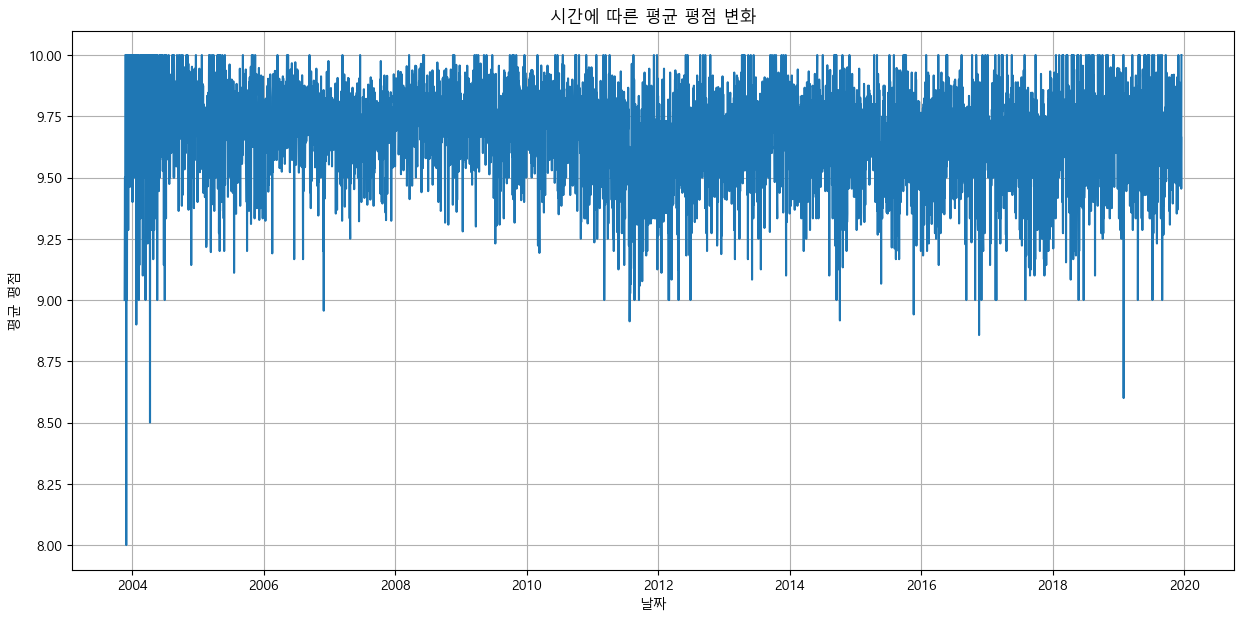

In [35]:
# 시간 데이터 변환 (Unix Timestamp -> 날짜)
datasets['users'].loc[:, 'time'] = pd.to_datetime(datasets['users']['time'], unit='s')

# 날짜별 평균 평점 계산
time_rate = datasets['users'].groupby(datasets['users']['time'].dt.date)['rate'].mean()


plt.figure(figsize=(15, 7))
time_rate.plot()
plt.title('시간에 따른 평균 평점 변화')
plt.xlabel('날짜')
plt.ylabel('평균 평점')
plt.grid()
plt.show()
